In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import ncar_jobqueue

import data_catalog
import tseries_mod
from CAM_tools import CAM_kg_to_dry_vmr
from xarray_w_units import mult_w_units, div_w_units
from utils import conv_units

%matplotlib inline

In [2]:
data_catalog.set_catalog('experiments')
varnames = ['TMCO2', 'PS', 'CO2']

active catalog: experiments


In [3]:
cluster = ncar_jobqueue.NCARCluster()

experiment = 'esm-piControl'
esm_piControl_ann = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, freq='ann', cluster_in=cluster)
esm_piControl_ann.attrs['experiment'] = experiment

experiment = 'esm-piControl-cmip5'
esm_piControl_cmip5_ann = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, stream='cam2.h0', freq='ann', cluster_in=cluster)
esm_piControl_cmip5_ann.attrs['experiment'] = experiment

cluster.close()

In [4]:
for ds_ann in [esm_piControl_ann, esm_piControl_cmip5_ann]:
    experiment = ds_ann.attrs['experiment']
    print(f'experiment={experiment}')

    # add CO2_BOT
    da = ds_ann['CO2'].isel(lev=-1)
    da.name = 'CO2_BOT'
    ds_ann[da.name] = da

    # add TMCO2_ppmv
    mwC = xr.DataArray(12.0, attrs={'units': 'g/mol'})
    conv_factor = CAM_kg_to_dry_vmr(ds_ann, mwC)
    print(div_w_units(1.0, conv_factor))
    da = mult_w_units(conv_factor, ds_ann['TMCO2'])
    conv_units(da, 'ppmv')
    da.name = 'TMCO2_ppmv'
    ds_ann[da.name] = da

experiment=esm-piControl
<xarray.DataArray ()>
array(2.11325384e+18)
Attributes:
    units:    kg
experiment=esm-piControl-cmip5
<xarray.DataArray ()>
array(2.11338567e+18)
Attributes:
    units:    kg


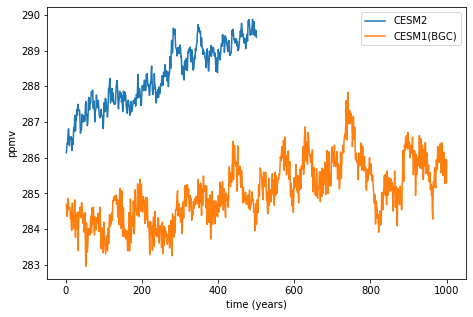

In [5]:
tseries_mod.tseries_plot_1var('CO2_BOT', [esm_piControl_ann, esm_piControl_cmip5_ann],
                              ['CESM2', 'CESM1(BGC)'],
                              figsize=(7.5,5),
                              fname='CO2_BOT_esm-piControl.pdf')

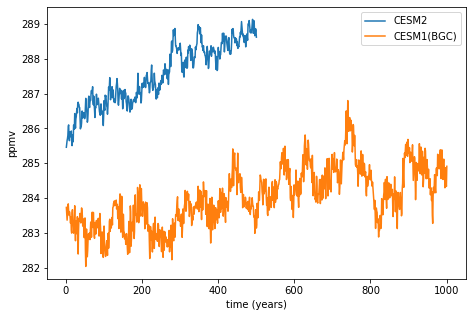

In [6]:
tseries_mod.tseries_plot_1var('TMCO2_ppmv', [esm_piControl_ann, esm_piControl_cmip5_ann],
                              ['CESM2', 'CESM1(BGC)'],
                              figsize=(7.5,5),
                              fname='TMCO2_esm-piControl.pdf')